In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF version: 2.10.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/50
469/469 - 1s - loss: 0.0867 - accuracy: 0.2697 - val_loss: 0.0834 - val_accuracy: 0.3672 - 1s/epoch - 3ms/step
Epoch 2/50
469/469 - 1s - loss: 0.0799 - accuracy: 0.4389 - val_loss: 0.0757 - val_accuracy: 0.5068 - 555ms/epoch - 1ms/step
Epoch 3/50
469/469 - 1s - loss: 0.0721 - accuracy: 0.5442 - val_loss: 0.0676 - val_accuracy: 0.5937 - 567ms/epoch - 1ms/step
Epoch 4/50
469/469 - 1s - loss: 0.0645 - accuracy: 0.6186 - val_loss: 0.0605 - val_accuracy: 0.6524 - 568ms/epoch - 1ms/step
Epoch 5/50
469/469 - 1s - loss: 0.0581 - accuracy: 0.6683 - val_loss: 0.0546 - val_accuracy: 0.6976 - 575ms/epoch - 1ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0529 - accuracy: 0.7057 - val_loss: 0.0499 - val_accuracy: 0.7304 - 579ms/epoch - 1ms/step
Epoch 7/50
469/469 - 1s - loss: 0.0488 - accuracy: 0.7317 - val_loss: 0.0461 - val_accuracy: 0.7520 - 623ms/epoch - 1ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0455 - accuracy: 0.7495 - val_loss: 0.0431 - val_accuracy: 0.7642 - 611ms/epoch - 1ms/step
Epo

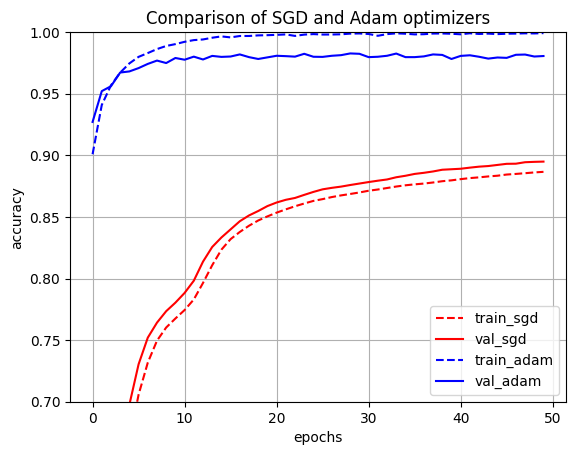

: 

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# MNIST 데이터셋 불러오기 (훈련/테스트)
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

# 28x28 이미지 → 1차원 벡터(784)로 reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 0~255 → 0~1 사이로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 레이블을 One-hot 인코딩으로 변환 (10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# MLP 모델 정의 (SGD optimizer용)
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))

# SGD Optimizer로 모델 컴파일
# 손실 함수: MSE (Mean Squared Error)
mlp_sgd.compile(
    loss='MSE',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# SGD Optimizer로 학습
hist_sgd = mlp_sgd.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=2
)

# SGD Optimizer 테스트 정확도 출력
print('SGD 정확률 =', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1] * 100)

# MLP 모델 정의 (Adam optimizer용)
mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))

# Adam Optimizer로 모델 컴파일
# 손실 함수: MSE
mlp_adam.compile(
    loss='MSE',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Adam Optimizer로 학습
hist_adam = mlp_adam.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=2
)

# Adam Optimizer 테스트 정확도 출력
print('Adam 정확률 =', mlp_adam.evaluate(x_test, y_test, verbose=0)[1] * 100)

# 학습 정확도 & 검증 정확도 비교 시각화
plt.plot(hist_sgd.history['accuracy'], 'r--')       # SGD 훈련 정확도 (점선)
plt.plot(hist_sgd.history['val_accuracy'], 'r')     # SGD 검증 정확도 (실선)
plt.plot(hist_adam.history['accuracy'], 'b--')      # Adam 훈련 정확도 (점선)
plt.plot(hist_adam.history['val_accuracy'], 'b')    # Adam 검증 정확도 (실선)

plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))           # y축 범위 설정
plt.xlabel('epochs')           # x축 라벨
plt.ylabel('accuracy')         # y축 라벨
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()
